In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
from datetime import datetime
from sklearn.decomposition import PCA
import matplotlib

## Pre-processing

There are null in driver2

In [2]:
df = pd.read_csv('Grad_Scheme_Case_Study_Dataset.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Quote_ID                50000 non-null  int64  
 1   Quote_Date              50000 non-null  object 
 2   Driver1_DOB             50000 non-null  object 
 3   Driver1_Licence_Type    50000 non-null  object 
 4   Driver1_Licence_Years   50000 non-null  float64
 5   Driver2_Licence_Type    32595 non-null  object 
 6   Driver2_Licence_Years   25614 non-null  float64
 7   Driver1_Convictions     50000 non-null  object 
 8   Driver1_Claims          50000 non-null  int64  
 9   Driver1_Marital_Status  50000 non-null  object 
 10  Vehicle_Age             50000 non-null  int64  
 11  Vehicle_Value           50000 non-null  int64  
 12  Tax                     50000 non-null  float64
 13  Vehicle_Annual_Mileage  50000 non-null  float64
 14  Credit_Score            50000 non-null

In [6]:
df.describe()

Quote_ID  Driver1_Licence_Years  Driver2_Licence_Years  \
count   50000.000000           50000.000000           25614.000000   
mean   149964.738240              19.661240              21.978332   
std     28890.771387              11.426496               6.787247   
min    100000.000000               0.000000               0.000000   
25%    124876.750000              11.000000              17.000000   
50%    150035.500000              18.000000              22.000000   
75%    174990.250000              27.000000              26.000000   
max    199998.000000              64.000000              50.000000   

       Driver1_Claims   Vehicle_Age  Vehicle_Value           Tax  \
count    50000.000000  50000.000000   50000.000000  50000.000000   
mean         0.703980     -7.255280    6923.618640    891.406711   
std          1.027547    414.791906    6246.163977   1174.513850   
min          0.000000  -9999.000000   -9999.000000  -9999.000000   
25%          0.000000      6.000000    2525.000000    333.100000   
50%          0.000000      9.000000    5307.000000    706.125000   
75%          2.000000     13.000000    9620.000000   1296.925000   
max          6.000000     75.000000   50000.000000   7500.000000   

       Vehicle_Annual_Mileage  Credit_Score  Days_to_Inception       Premium  \
count            50000.000000  50000.000000       50000.000000  50000.000000   
mean              5996.067800    398.175700           7.310900   1009.481090   
std               9433.621696    229.783572           8.291635   1234.122388   
min              -9999.000000      0.000000           0.000000    100.080000   
25%               1846.000000    200.000000           1.000000    586.777500   
50%               3772.000000    397.000000           4.000000    871.050000   
75%               7742.750000    597.000000          11.000000   1180.110000   
max             200000.000000    799.000000          30.000000  19968.440000   

       Capped_Premium  
count    50000.000000  
mean       936.803096  
std        538.666540  
min        100.080000  
25%        586.777500  
50%        871.050000  
75%       1180.110000  
max       4000.000000

### Repeat data

In [3]:
len(df.Quote_ID.unique())

49641

All the same

In [8]:
df[df.duplicated()]

Quote_ID  Quote_Date Driver1_DOB Driver1_Licence_Type  \
2646     137539  14/09/2020  09/09/1981              Full UK   
3413     137958  10/04/2020  15/05/1996              Full UK   
4535     115116  18/04/2020  21/08/1962              Full UK   
5013     168159  24/03/2020  26/06/1961            Automatic   
5598     124169  11/11/2020  23/09/1981              Full UK   
...         ...         ...         ...                  ...   
49465    157158  01/04/2020  17/10/1963              Full UK   
49637    183671  09/10/2020  19/11/1986              Full UK   
49930    120345  02/01/2020  29/07/1971              Full UK   
49991    131616  16/04/2020  18/07/1956            Automatic   
49992    193681  20/11/2020  24/12/1950              Full UK   

       Driver1_Licence_Years Driver2_Licence_Type  Driver2_Licence_Years  \
2646                     1.0              Full UK                    NaN   
3413                     6.0                  NaN                    NaN   
4535                    20.0              Full UK                   16.0   
5013                    17.0              Full UK                   26.0   
5598                    13.0                  NaN                    NaN   
...                      ...                  ...                    ...   
49465                    2.0              Full UK                   17.0   
49637                    3.0              Full UK                    NaN   
49930                   26.0                  NaN                   33.0   
49991                   31.0                  NaN                   37.0   
49992                   38.0              Full UK                   24.0   

      Driver1_Convictions  Driver1_Claims Driver1_Marital_Status  Vehicle_Age  \
2646                   No               3                Married           16   
3413                   No               3                Married            5   
4535                   No               0                Widowed            4   
5013                  Yes               3                Married            6   
5598                   No               0                Married           11   
...                   ...             ...                    ...          ...   
49465                  No               3                Married            9   
49637                  No               2                 Single           11   
49930                  No               3      Civil Partnership           14   
49991                 Yes               2                 Single            5   
49992                  No               2                 Single           75   

       Vehicle_Value      Tax  Vehicle_Annual_Mileage  Credit_Score  \
2646             413    61.95                  1096.0            48   
3413            8653  1297.95                  7150.0           614   
4535           11489  1723.35                  4653.0           731   
5013            7292   729.20                  3690.0           156   
5598            1515   227.25                  2355.0           231   
...              ...      ...                     ...           ...   
49465           3080   308.00                  3106.0            55   
49637           4661   699.15                  2458.0            97   
49930           1754   175.40                  1931.0           563   
49991           8471  1270.65                  8445.0           596   
49992          11265  1689.75                  8993.0           377   

      Payment_Type  Days_to_Inception  Premium  Capped_Premium  
2646       Monthly                  3  1240.05         1240.05  
3413        Annual                  5   854.07          854.07  
4535        Annual                  4   889.47          889.47  
5013       Monthly                  0  1208.52         1208.52  
5598       Monthly                  1  1432.74         1432.74  
...            ...                ...      ...             ...  
49465      Monthly                 30  1873.

Drop duplicate

In [3]:
df = df.drop_duplicates(keep='last')
df.Quote_ID.count()

49641

### Data cleaning

-9999

Might be unknown

In [4]:
des = df[(df['Vehicle_Age']<0) | (df['Vehicle_Value']<0) | (df['Vehicle_Annual_Mileage']<0) | (df['Tax']<0) | (df['Driver1_Convictions']=='-9999')]

In [5]:
df = df[~df.index.isin(des.index)]
df.count()[0]

47576

Driver2

In [6]:
DriverType = df.Driver2_Licence_Type.unique()
DriverType

array([nan, 'Full UK', 'Automatic', 'Provisional UK',
       'Full International', 'Full Non EU/EEC', 'Full EU/EEC'],
      dtype=object)

In [7]:
df.Driver2_Licence_Type.value_counts()

Full UK               26233
Automatic              3966
Provisional UK          708
Full International      103
Full EU/EEC              19
Full Non EU/EEC           2
Name: Driver2_Licence_Type, dtype: int64

Fill Full uk

In [8]:
df1 = df[df['Driver2_Licence_Type'].isna() & df['Driver2_Licence_Years']>0].fillna('Full UK')
df[df['Driver2_Licence_Type'].isna() & df['Driver2_Licence_Years']>0] = df1
print('Driver2 without licence type:', df[df['Driver2_Licence_Type'].isna() & df['Driver2_Licence_Years']>0].count()[0])

Driver2 without licence type: 0


Fill no

In [9]:
df['Driver2_Licence_Type'] = df.Driver2_Licence_Type.fillna('No')

df.head()

Quote_ID  Quote_Date Driver1_DOB Driver1_Licence_Type  \
0    190537  01/09/2020  16/06/1959              Full UK   
1    161332  06/01/2020  03/09/1977              Full UK   
2    161666  21/07/2020  24/03/1990              Full UK   
3    171589  07/11/2020  11/03/1980              Full UK   
4    154037  16/08/2020  17/09/1977              Full UK   

   Driver1_Licence_Years Driver2_Licence_Type  Driver2_Licence_Years  \
0                   34.0                   No                    NaN   
1                   12.0                   No                    NaN   
2                    9.0              Full UK                   20.0   
3                   17.0              Full UK                    NaN   
4                   25.0              Full UK                    NaN   

  Driver1_Convictions  Driver1_Claims Driver1_Marital_Status  Vehicle_Age  \
0                  No               0                Married            4   
1                  No               2                Married           14   
2                  No               0                Married            5   
3                  No               2                Married            6   
4                  No               0              Separated            8   

   Vehicle_Value      Tax  Vehicle_Annual_Mileage  Credit_Score Payment_Type  \
0          24178  3626.70                 12849.0           240      Monthly   
1           1744   174.40                  1250.0           200       Annual   
2          20199  3029.85                 21847.0           644       Annual   
3          12569  1885.35                 12266.0           548       Annual   
4          11395  1709.25                 11117.0           393       Annual   

   Days_to_Inception  Premium  Capped_Premium  
0                 11   707.64          707.64  
1                  4  1176.96         1176.96  
2                  0   594.84          594.84  
3                  0  1282.56         1282.56  
4                 30  1471.02         1471.02

In [10]:
df = df.drop(columns=['Quote_ID', 'Quote_Date', 'Driver2_Licence_Years'])

### Data Transformation

Categorical data

In [11]:
C = (df.dtypes == 'object')
CategoricalVariables = list(C[C].index)
df[CategoricalVariables].head()

Driver1_DOB Driver1_Licence_Type Driver2_Licence_Type Driver1_Convictions  \
0  16/06/1959              Full UK                   No                  No   
1  03/09/1977              Full UK                   No                  No   
2  24/03/1990              Full UK              Full UK                  No   
3  11/03/1980              Full UK              Full UK                  No   
4  17/09/1977              Full UK              Full UK                  No   

  Driver1_Marital_Status Payment_Type  
0                Married      Monthly  
1                Married       Annual  
2                Married       Annual  
3                Married       Annual  
4              Separated       Annual

Date format

In [12]:
df['Driver1_DOB'] = pd.to_datetime(df.Driver1_DOB)
a = df.Driver1_DOB.map(lambda x : (datetime.now()-x).days//365)
df=df.drop(columns=['Driver1_DOB'])
df.insert(1, 'Driver1_Age', a)


C:\Users\jigme\AppData\Local\Temp\ipykernel_13932\2642498113.py:1: UserWarning: Parsing '16/06/1959' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['Driver1_DOB'] = pd.to_datetime(df.Driver1_DOB)
C:\Users\jigme\AppData\Local\Temp\ipykernel_13932\2642498113.py:1: UserWarning: Parsing '24/03/1990' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['Driver1_DOB'] = pd.to_datetime(df.Driver1_DOB)
C:\Users\jigme\AppData\Local\Temp\ipykernel_13932\2642498113.py:1: UserWarning: Parsing '17/09/1977' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['Driver1_DOB'] = pd.to_datetime(df.Driver1_DOB)
C:\Users\jigme\AppData\Local\Temp\ipykernel_13932\2642498113.py:1: UserWarning: Parsing '14/09/1998' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['Driver1_DOB'] = pd.to_datetime(df.D

C:\Users\jigme\AppData\Local\Temp\ipykernel_13932\2642498113.py:1: UserWarning: Parsing '14/02/1948' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['Driver1_DOB'] = pd.to_datetime(df.Driver1_DOB)
C:\Users\jigme\AppData\Local\Temp\ipykernel_13932\2642498113.py:1: UserWarning: Parsing '18/10/1992' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['Driver1_DOB'] = pd.to_datetime(df.Driver1_DOB)
C:\Users\jigme\AppData\Local\Temp\ipykernel_13932\2642498113.py:1: UserWarning: Parsing '20/05/2001' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['Driver1_DOB'] = pd.to_datetime(df.Driver1_DOB)
C:\Users\jigme\AppData\Local\Temp\ipykernel_13932\2642498113.py:1: UserWarning: Parsing '14/05/1976' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['Driver1_DOB'] = pd.to_datetime(df.D

OneHotEncoder

In [13]:
df['Driver1_Marital_Status'] = df['Driver1_Marital_Status'].str.lower()
for i in CategoricalVariables[1:]:
    print(i,": ", df[i].unique())

Driver1_Licence_Type :  ['Full UK' 'Automatic' 'Provisional UK' 'Full EU/EEC']
Driver2_Licence_Type :  ['No' 'Full UK' 'Automatic' 'Provisional UK' 'Full International'
 'Full Non EU/EEC' 'Full EU/EEC']
Driver1_Convictions :  ['No' 'Yes']
Driver1_Marital_Status :  ['married' 'separated' 'widowed' 'single' 'other' 'divorced' 'common law'
 'civil partnership']
Payment_Type :  ['Monthly' 'Annual']


In [14]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(drop='first')
ans = enc.fit_transform(df[CategoricalVariables[1:]]).toarray()
ans

array([[0., 1., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 1., 0., 1.],
       [0., 1., 0., ..., 1., 0., 1.]])

In [15]:
nameList = []
for int, ite in enumerate(enc.categories_):
    check = 0
    for j in ite:
        if check != 0:
            name = CategoricalVariables[int+1]+'_'+str(j)
            nameList.append(name)
        else:
            check = 1
                
nameList

['Driver1_Licence_Type_Full EU/EEC',
 'Driver1_Licence_Type_Full UK',
 'Driver1_Licence_Type_Provisional UK',
 'Driver2_Licence_Type_Full EU/EEC',
 'Driver2_Licence_Type_Full International',
 'Driver2_Licence_Type_Full Non EU/EEC',
 'Driver2_Licence_Type_Full UK',
 'Driver2_Licence_Type_No',
 'Driver2_Licence_Type_Provisional UK',
 'Driver1_Convictions_Yes',
 'Driver1_Marital_Status_common law',
 'Driver1_Marital_Status_divorced',
 'Driver1_Marital_Status_married',
 'Driver1_Marital_Status_other',
 'Driver1_Marital_Status_separated',
 'Driver1_Marital_Status_single',
 'Driver1_Marital_Status_widowed',
 'Payment_Type_Monthly']

In [16]:
nominal = pd.DataFrame(ans, columns=nameList)
nominal

Driver1_Licence_Type_Full EU/EEC  Driver1_Licence_Type_Full UK  \
0                                   0.0                           1.0   
1                                   0.0                           1.0   
2                                   0.0                           1.0   
3                                   0.0                           1.0   
4                                   0.0                           1.0   
...                                 ...                           ...   
47571                               0.0                           1.0   
47572                               0.0                           1.0   
47573                               0.0                           0.0   
47574                               0.0                           1.0   
47575                               0.0                           1.0   

       Driver1_Licence_Type_Provisional UK  Driver2_Licence_Type_Full EU/EEC  \
0                                      0.0                               0.0   
1                                      0.0                               0.0   
2                                      0.0                               0.0   
3                                      0.0                               0.0   
4                                      0.0                               0.0   
...                                    ...                               ...   
47571                                  0.0                               0.0   
47572                                  0.0                               0.0   
47573                                  0.0                               0.0   
47574                                  0.0                               0.0   
47575                                  0.0                               0.0   

       Driver2_Licence_Type_Full International  \
0                                          0.0   
1                                          0.0   
2                                          0.0   
3                                          0.0   
4                                          0.0   
...                                        ...   
47571                                      0.0   
47572                                      0.0   
47573                                      0.0   
47574                                      0.0   
47575                                      0.0   

       Driver2_Licence_Type_Full Non EU/EEC  Driver2_Licence_Type_Full UK  \
0                                       0.0                           0.0   
1                                       0.0                           0.0   
2                                       0.0                           1.0   
3                                       0.0                           1.0   
4                                       0.0                           1.0   
...                                     ...                           ...   
47571                                   0.0                           1.0   
47572                                   0.0                           1.0   
47573                                   0.0                           1.0   
47574                                   0.0                           0.0   
47575                                   0.0                           1.0   

       Driver2_Licence_Type_No  Driver2_Licence_Type_Provisional UK  \
0                          1.0                                  0.0   
1                          1.0                                  0.0   
2                          0.0                                  0.0   
3                          0.0                                  0.0   
4                          0.0                                  0.0   
...                        ...                                  ...   
47571                      0.0                                  0.0   
47572                      0.0                                  0.0   
4757

In [17]:
numerical = df.drop(columns=CategoricalVariables[1:]).reset_index(drop=True)
numerical

Driver1_Age  Driver1_Licence_Years  Driver1_Claims  Vehicle_Age  \
0               63                   34.0               0            4   
1               46                   12.0               2           14   
2               33                    9.0               0            5   
3               42                   17.0               2            6   
4               45                   25.0               0            8   
...            ...                    ...             ...          ...   
47571           33                   12.0               0           14   
47572           31                    1.0               0            6   
47573           33                   13.0               0            8   
47574           73                    0.0               0            3   
47575           64                   32.0               2           13   

       Vehicle_Value      Tax  Vehicle_Annual_Mileage  Credit_Score  \
0              24178  3626.70                 12849.0           240   
1               1744   174.40                  1250.0           200   
2              20199  3029.85                 21847.0           644   
3              12569  1885.35                 12266.0           548   
4              11395  1709.25                 11117.0           393   
...              ...      ...                     ...           ...   
47571           1633   244.95                  1074.0           397   
47572           8050  1207.50                  2987.0           158   
47573          11124  1112.40                  3364.0           328   
47574          10821  1623.15                  9303.0           277   
47575           1456   218.40                  1360.0           774   

       Days_to_Inception  Premium  Capped_Premium  
0                     11   707.64          707.64  
1                      4  1176.96         1176.96  
2                      0   594.84          594.84  
3                      0  1282.56         1282.56  
4                     30  1471.02         1471.02  
...                  ...      ...             ...  
47571                 30   451.50          451.50  
47572                  4  1375.59         1375.59  
47573                  3  1207.05         1207.05  
47574                  0  1776.93         1776.93  
47575                  2   824.40          824.40  

[47576 rows x 11 columns]

In [18]:
numerical[nameList] = nominal
df2 = numerical

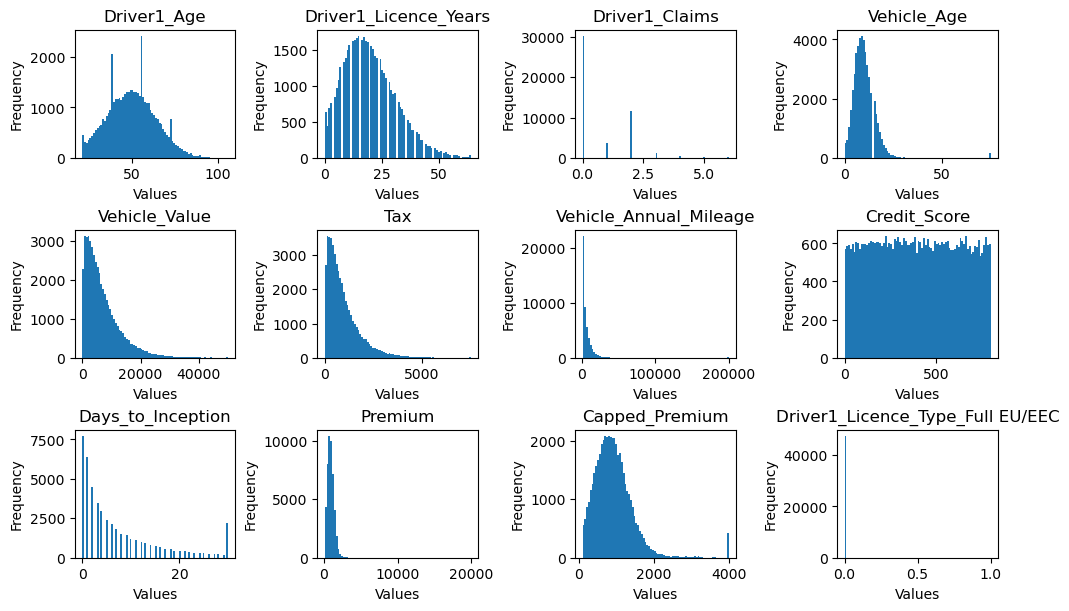

In [21]:
fig, axs = plt.subplots(3, 4, figsize=(10, 6), layout='constrained')

for dfi, ax  in enumerate(axs.flat):
    if dfi < 15:
        ax.set_title(numerical.columns[dfi])
        ax.set_ylabel('Frequency')
        ax.set_xlabel('Values')
        ax.hist(numerical.iloc[:,dfi], bins=80)
plt.show()


In [19]:
df2 = df2[(df2['Vehicle_Age']<70) & (df2['Vehicle_Annual_Mileage']<190000) ]
df2

Driver1_Age  Driver1_Licence_Years  Driver1_Claims  Vehicle_Age  \
0               63                   34.0               0            4   
1               46                   12.0               2           14   
2               33                    9.0               0            5   
3               42                   17.0               2            6   
4               45                   25.0               0            8   
...            ...                    ...             ...          ...   
47571           33                   12.0               0           14   
47572           31                    1.0               0            6   
47573           33                   13.0               0            8   
47574           73                    0.0               0            3   
47575           64                   32.0               2           13   

       Vehicle_Value      Tax  Vehicle_Annual_Mileage  Credit_Score  \
0              24178  3626.70                 12849.0           240   
1               1744   174.40                  1250.0           200   
2              20199  3029.85                 21847.0           644   
3              12569  1885.35                 12266.0           548   
4              11395  1709.25                 11117.0           393   
...              ...      ...                     ...           ...   
47571           1633   244.95                  1074.0           397   
47572           8050  1207.50                  2987.0           158   
47573          11124  1112.40                  3364.0           328   
47574          10821  1623.15                  9303.0           277   
47575           1456   218.40                  1360.0           774   

       Days_to_Inception  Premium  ...  Driver2_Licence_Type_Provisional UK  \
0                     11   707.64  ...                                  0.0   
1                      4  1176.96  ...                                  0.0   
2                      0   594.84  ...                                  0.0   
3                      0  1282.56  ...                                  0.0   
4                     30  1471.02  ...                                  0.0   
...                  ...      ...  ...                                  ...   
47571                 30   451.50  ...                                  0.0   
47572                  4  1375.59  ...                                  0.0   
47573                  3  1207.05  ...                                  0.0   
47574                  0  1776.93  ...                                  1.0   
47575                  2   824.40  ...                                  0.0   

       Driver1_Convictions_Yes  Driver1_Marital_Status_common law  \
0                          0.0                                0.0   
1                          0.0                                0.0   
2                          0.0                                0.0   
3                          0.0                                0.0   
4                          0.0                                0.0   
...                        ...                                ...   
47571                      0.0                                0.0   
47572                      0.0                                0.0   
47573                      0.0                                0.0   
47574                      0.0                                0.0   
47575                      0.0                                0.0   

       Driver1_Marital_Status_divorced  Driver1_Marital_Status_married  \
0                                  0.0                             1.0   
1                                  0.0                             1.0   
2                                  0.0                             1.0   
3                                  0.0                             1.0   
4                                  0.0                             0.0   
...                                ...     

### data distribution

In [20]:
x = df2.drop(columns=['Premium', 'Capped_Premium'])
y = df2['Capped_Premium']

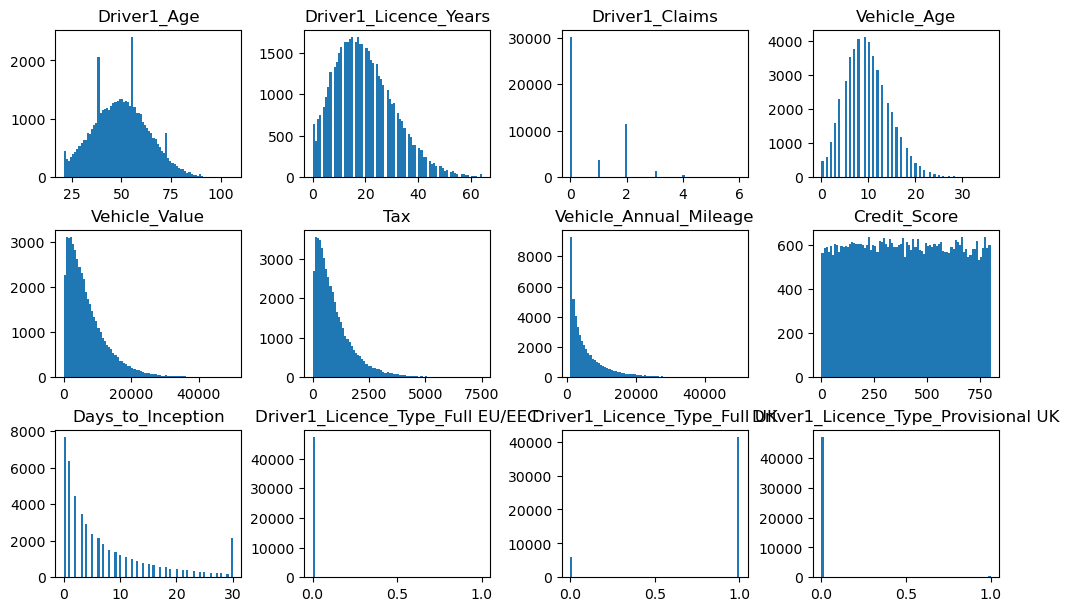

In [28]:
fig, axs = plt.subplots(3, 4, figsize=(10, 6), layout='constrained')

for dfi, ax  in enumerate(axs.flat):
    if dfi < 15:
        ax.set_title(x.columns[dfi])
        ax.hist(x.iloc[:,dfi], bins=80)
plt.show()


### Data Standardization

In [21]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x.iloc[:,:9] = scaler.fit_transform(x.iloc[:,:9])

x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47356 entries, 0 to 47575
Data columns (total 27 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Driver1_Age                              47356 non-null  float64
 1   Driver1_Licence_Years                    47356 non-null  float64
 2   Driver1_Claims                           47356 non-null  float64
 3   Vehicle_Age                              47356 non-null  float64
 4   Vehicle_Value                            47356 non-null  float64
 5   Tax                                      47356 non-null  float64
 6   Vehicle_Annual_Mileage                   47356 non-null  float64
 7   Credit_Score                             47356 non-null  float64
 8   Days_to_Inception                        47356 non-null  float64
 9   Driver1_Licence_Type_Full EU/EEC         47356 non-null  float64
 10  Driver1_Licence_Type_Full UK             47356

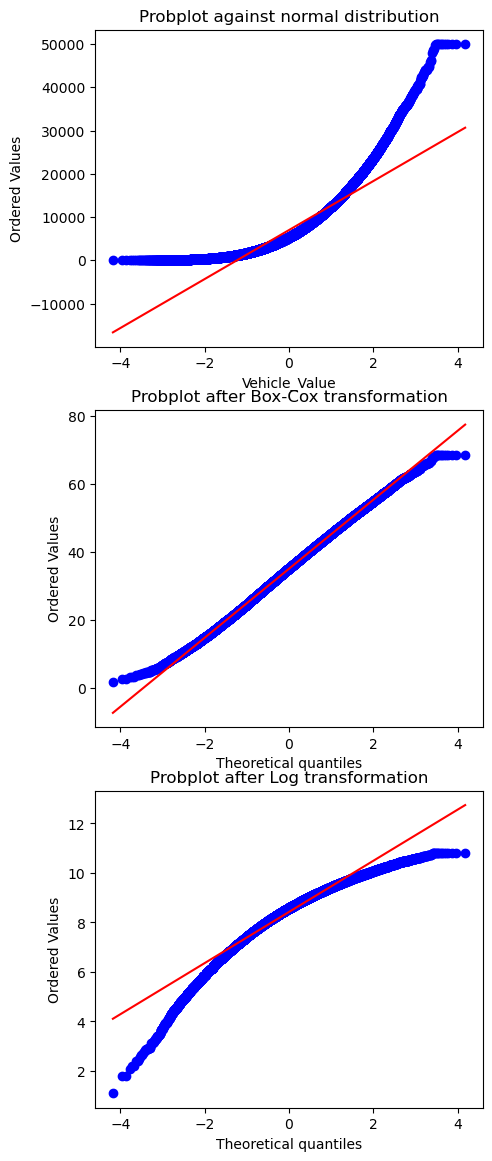

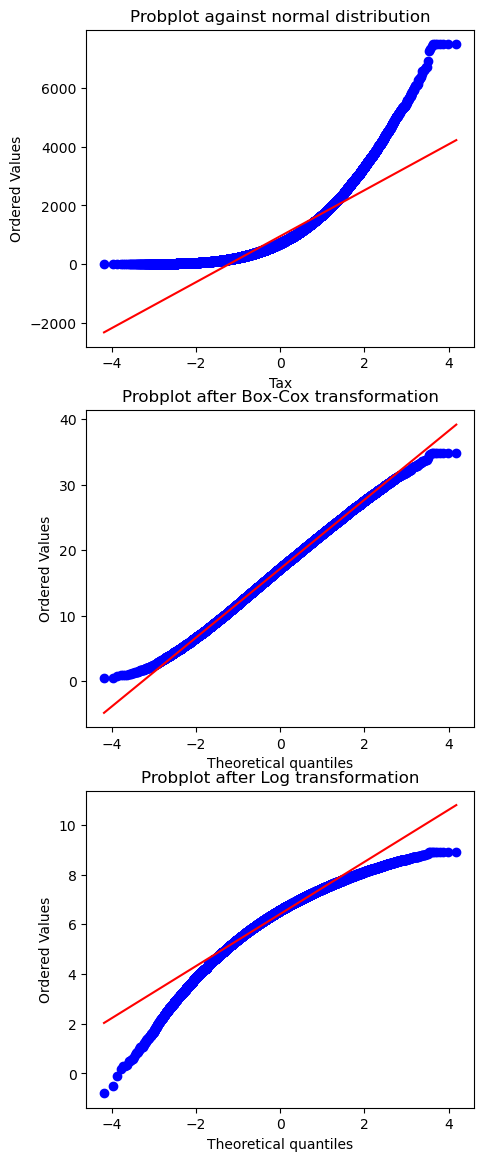

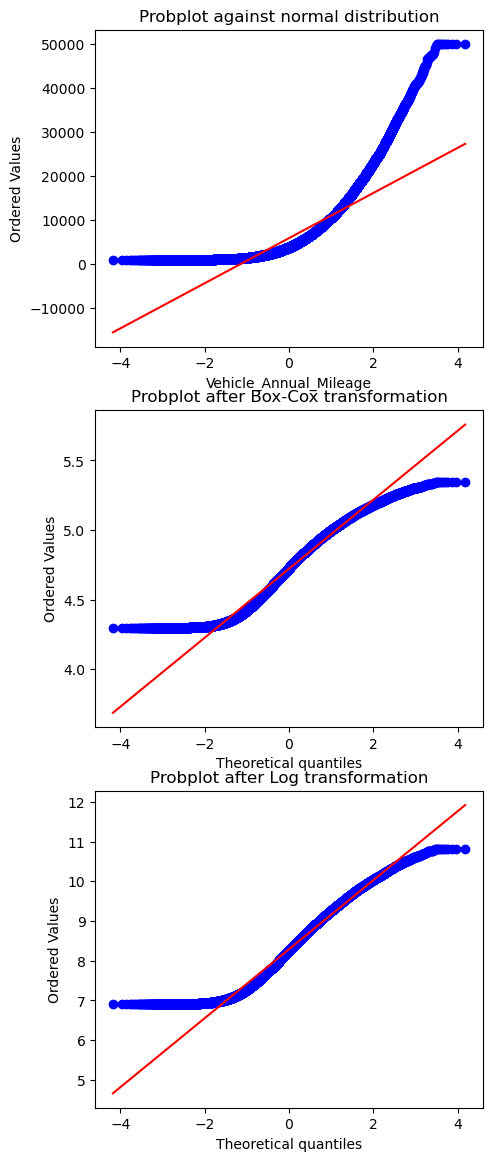

In [30]:
from scipy import stats

for i in df2.columns[4:7]:
    fig = plt.figure(figsize=(5, 14))
    ax1 = fig.add_subplot(311)
    xa = df2[i]
    prob = stats.probplot(xa, dist=stats.norm, plot=ax1)
    ax1.set_xlabel(i)
    ax1.set_title('Probplot against normal distribution')

    ax2 = fig.add_subplot(312)
    xt, _ = stats.boxcox(xa+1)
    prob = stats.probplot(xt, dist=stats.norm, plot=ax2)
    ax2.set_title('Probplot after Box-Cox transformation')

    ax3 = fig.add_subplot(313)
    test = np.log(df2[i])
    prob = stats.probplot(test, dist=stats.norm, plot=ax3)
    ax3.set_title('Probplot after Log transformation')
plt.show()

In [22]:
from scipy import stats
for i in x.columns[4:7]:

    xtemp = x[i]
    xt, _ = stats.boxcox(xtemp+1)
    x[i] = xt
x

Driver1_Age  Driver1_Licence_Years  Driver1_Claims  Vehicle_Age  \
0         0.494118               0.531250        0.000000     0.111111   
1         0.294118               0.187500        0.333333     0.388889   
2         0.141176               0.140625        0.000000     0.138889   
3         0.247059               0.265625        0.333333     0.166667   
4         0.282353               0.390625        0.000000     0.222222   
...            ...                    ...             ...          ...   
47571     0.141176               0.187500        0.000000     0.388889   
47572     0.117647               0.015625        0.000000     0.166667   
47573     0.141176               0.203125        0.000000     0.222222   
47574     0.611765               0.000000        0.000000     0.083333   
47575     0.505882               0.500000        0.333333     0.361111   

       Vehicle_Value       Tax  Vehicle_Annual_Mileage  Credit_Score  \
0           0.167872  0.153396                0.105311      0.300375   
1           0.031363  0.021452                0.004991      0.250313   
2           0.159620  0.146984                0.121315      0.806008   
3           0.132534  0.124593                0.103428      0.685857   
4           0.126313  0.119228                0.099217      0.491865   
...              ...       ...                     ...           ...   
47571       0.029555  0.029239                0.001500      0.496871   
47572       0.103892  0.099369                0.034239      0.197747   
47573       0.124770  0.094650                0.039511      0.410513   
47574       0.122993  0.116337                0.090925      0.346683   
47575       0.026621  0.026366                0.007117      0.968711   

       Days_to_Inception  Driver1_Licence_Type_Full EU/EEC  ...  \
0               0.366667                               0.0  ...   
1               0.133333                               0.0  ...   
2               0.000000                               0.0  ...   
3               0.000000                               0.0  ...   
4               1.000000                               0.0  ...   
...                  ...                               ...  ...   
47571           1.000000                               0.0  ...   
47572           0.133333                               0.0  ...   
47573           0.100000                               0.0  ...   
47574           0.000000                               0.0  ...   
47575           0.066667                               0.0  ...   

       Driver2_Licence_Type_Provisional UK  Driver1_Convictions_Yes  \
0                                      0.0                      0.0   
1                                      0.0                      0.0   
2                                      0.0                      0.0   
3                                      0.0                      0.0   
4                                      0.0                      0.0   
...                                    ...                      ...   
47571                                  0.0                      0.0   
47572                                  0.0                      0.0   
47573                                  0.0                      0.0   
47574                                  1.0                      0.0   
47575                                  0.0                      0.0   

       Driver1_Marital_Status_common law  Driver1_Marital_Status_divorced  \
0                                    0.0                              0.0   
1                                    0.0                              0.0   
2                                    0.0                              0.0   
3                                    0.0                              0.0   
4                                    0.0                              0.0   
...                                  ...                              ...   
47571                                0.0                

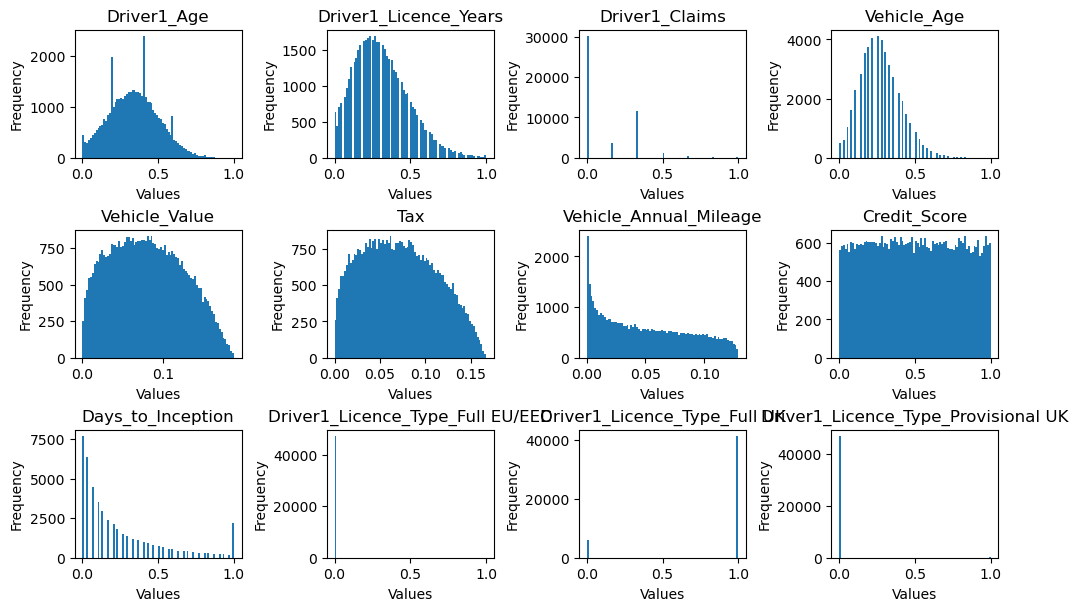

In [32]:
fig, axs = plt.subplots(3, 4, figsize=(10, 6), layout='constrained')

for dfi, ax  in enumerate(axs.flat):
    if dfi < 15:
        ax.set_title(x.columns[dfi])
        ax.set_ylabel('Frequency')
        ax.set_xlabel('Values')
        ax.hist(x.iloc[:,dfi], bins=80)
plt.show()


## EDA

### correlation matrices

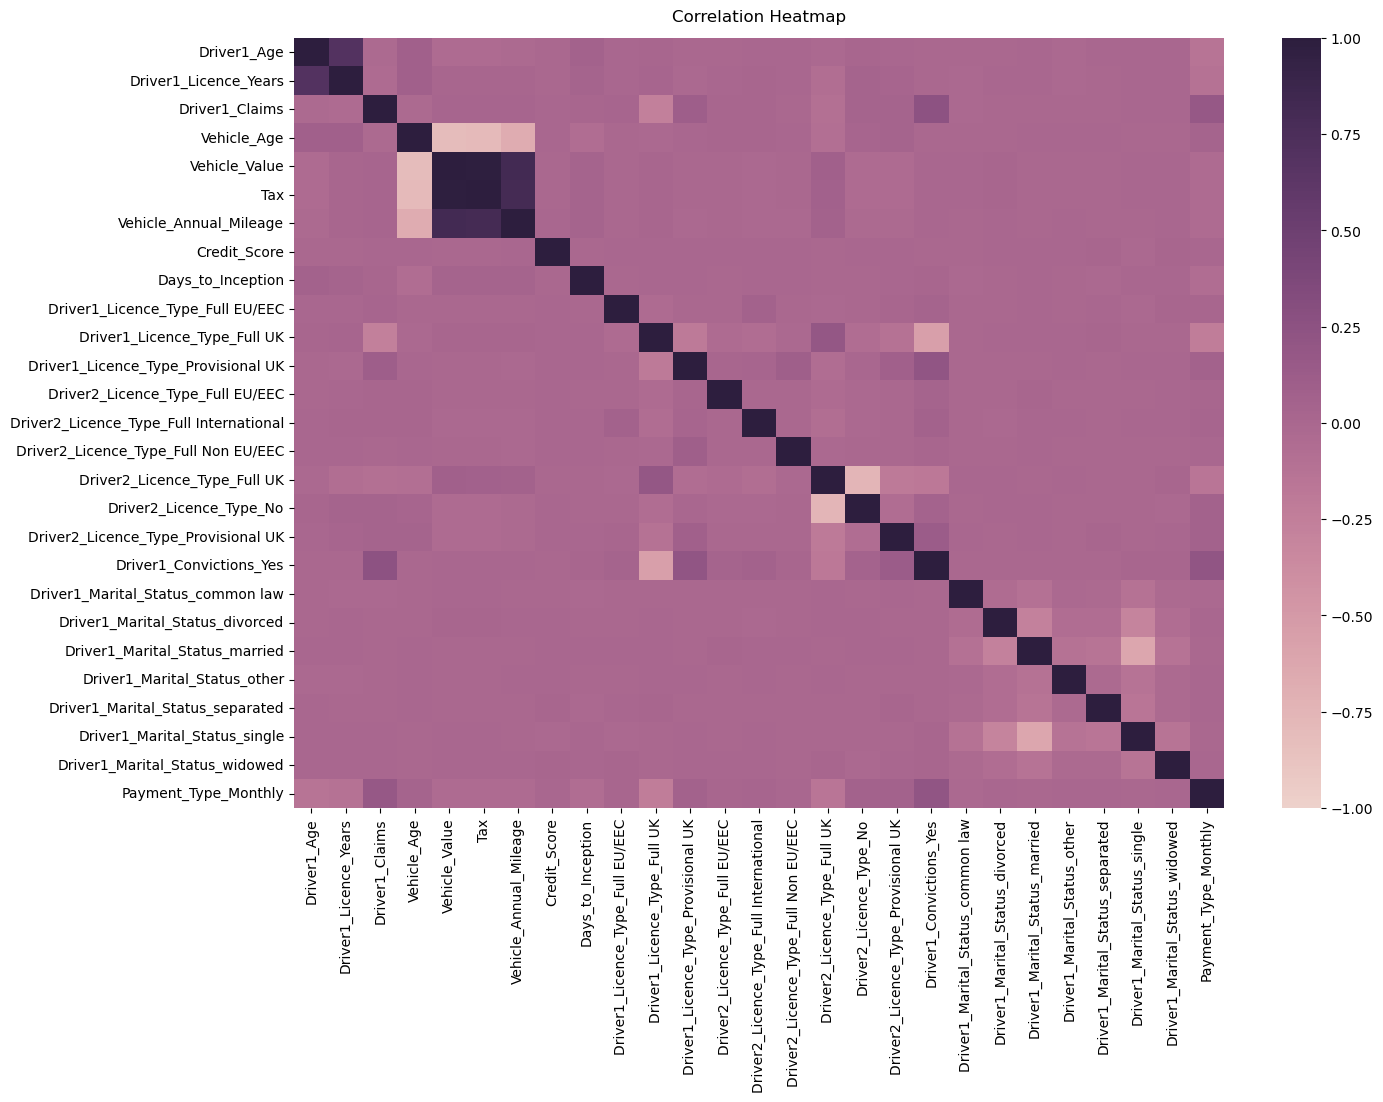

In [33]:
plt.figure(figsize=(15, 10))

heatmap = sns.heatmap(x.corr(), vmin=-1, vmax=1, annot=False, cmap=sns.cubehelix_palette(as_cmap=True))

heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

### PCA 

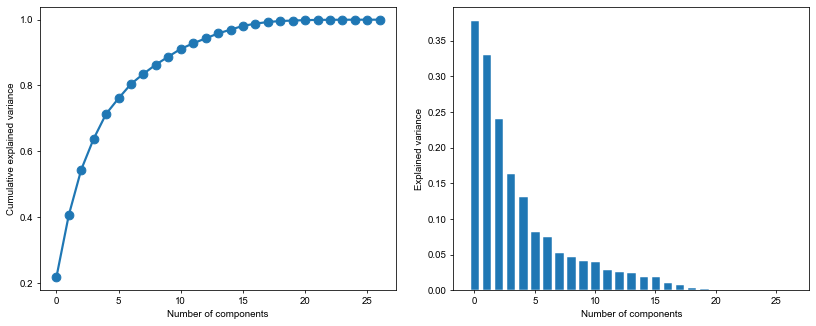

In [34]:
from sklearn.decomposition import PCA
import matplotlib

pca = PCA().fit(x)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5), dpi=70, facecolor='w', edgecolor='k')
ax0, ax1 = axes.flatten()

sns.set('talk', palette='colorblind')


ax0.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
ax0.set_xlabel('Number of components')
ax0.set_ylabel('Cumulative explained variance');

ax1.bar(range(x.shape[1]),pca.explained_variance_)
ax1.set_xlabel('Number of components')
ax1.set_ylabel('Explained variance');

plt.tight_layout()
plt.show()

8 components cover 90% of variance.

C:\Users\jigme\AppData\Local\Temp\ipykernel_9844\743527701.py:10: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


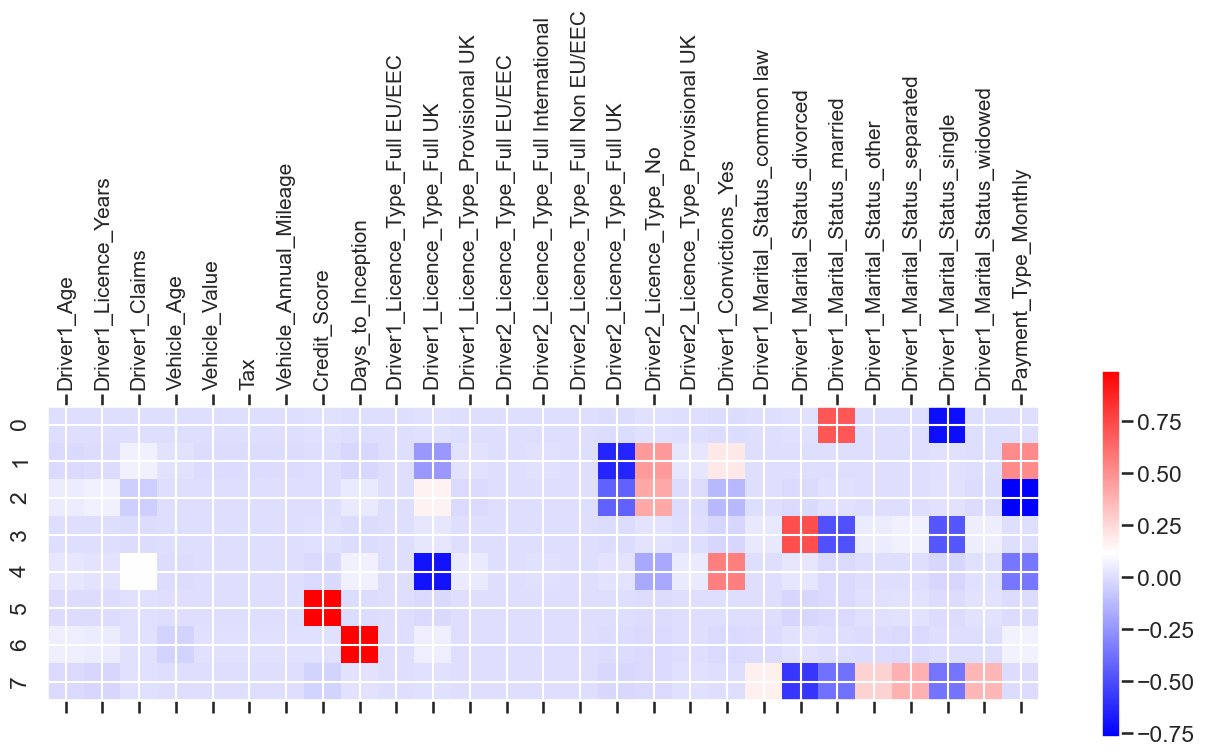

In [35]:
pca = PCA(8).fit((x))

X_pca1=pca.transform((x)) 

plt.matshow(pca.components_,cmap='bwr')
plt.xticks([a for a in range(27)],x,fontsize=15,rotation=90)
plt.yticks(rotation=90)
plt.colorbar()

plt.tight_layout()
plt.show()

In [38]:
PCA_vars = [0]*len(x)
def ExtractColumn(lst,j): 
    return [item[j] for item in lst] 

for i, feature in zip(range(len(x)),x):
    x1 = ExtractColumn(pca.components_,i)
    if ((max(x1) > 0.4) | (min(x1) < -0.4)):
        if abs(max(x1)) > abs(min(x1)):
            PCA_vars[i] = max(x1)
        else:
            PCA_vars[i] = min(x1)                 
    else:
        PCA_vars[i] = 0

PCA_vars = pd.DataFrame(list(zip(x,PCA_vars)),columns=('Name','Max absolute contribution'),index=range(1,28,1))      
PCA_vars = PCA_vars[(PCA_vars['Max absolute contribution']!=0)]
PCA_vars

Name  Max absolute contribution
8                      Credit_Score                   0.999287
9                 Days_to_Inception                   0.992035
11     Driver1_Licence_Type_Full UK                  -0.704821
16     Driver2_Licence_Type_Full UK                  -0.643235
17          Driver2_Licence_Type_No                   0.466510
19          Driver1_Convictions_Yes                   0.562194
21  Driver1_Marital_Status_divorced                   0.724176
22   Driver1_Marital_Status_married                   0.698439
25    Driver1_Marital_Status_single                  -0.715471
27             Payment_Type_Monthly                  -0.769057

## PCA -- Driver1

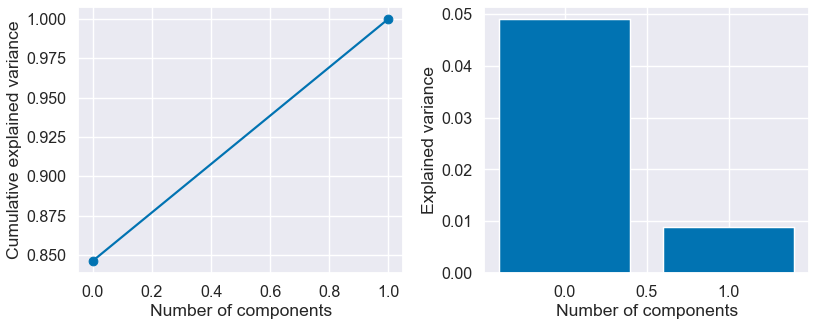

In [24]:
from sklearn.decomposition import PCA
import matplotlib

pca = PCA().fit(x[['Driver1_Age', 'Driver1_Licence_Years']])
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5), dpi=70, facecolor='w', edgecolor='k')
ax0, ax1 = axes.flatten()

sns.set('talk', palette='colorblind')


ax0.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
ax0.set_xlabel('Number of components')
ax0.set_ylabel('Cumulative explained variance');

ax1.bar(range(x[['Driver1_Age', 'Driver1_Licence_Years']].shape[1]),pca.explained_variance_)
ax1.set_xlabel('Number of components')
ax1.set_ylabel('Explained variance');

plt.tight_layout()
plt.show()

## PCA -- Vehicle related

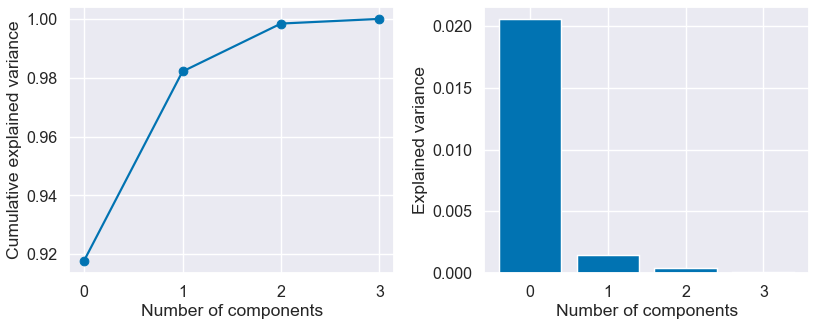

In [26]:
from sklearn.decomposition import PCA
import matplotlib

pca = PCA().fit(x[['Vehicle_Age', 'Tax', 'Vehicle_Value', 'Vehicle_Annual_Mileage']])
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5), dpi=70, facecolor='w', edgecolor='k')
ax0, ax1 = axes.flatten()

sns.set('talk', palette='colorblind')


ax0.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
ax0.set_xlabel('Number of components')
ax0.set_ylabel('Cumulative explained variance');

ax1.bar(range(x[['Vehicle_Age', 'Tax', 'Vehicle_Value', 'Vehicle_Annual_Mileage']].shape[1]),pca.explained_variance_)
ax1.set_xlabel('Number of components')
ax1.set_ylabel('Explained variance');

plt.tight_layout()
plt.show()

## dimensionality reduction

In [32]:
def pcat(X,n):
    pca = PCA(n).fit((X))

    X_pca1=pca.transform((X)) 
    return X_pca1


In [28]:
x1 = x.copy()

In [29]:
x1 = x1.drop(columns=['Driver1_Age', 'Driver1_Licence_Years', 'Vehicle_Age', 'Tax', 'Vehicle_Value', 'Vehicle_Annual_Mileage'])


In [33]:
x1['Driver_pca'] = pcat(x[['Driver1_Age', 'Driver1_Licence_Years']],1)
x1['Vehicle_pca'] = pcat(x[['Vehicle_Age', 'Tax', 'Vehicle_Value', 'Vehicle_Annual_Mileage']],1)

# Modelling

In [34]:
from sklearn.model_selection import train_test_split
b = y
a = x1
x1, x2, y, y2 = train_test_split(a, b, test_size=0.2, random_state=42)

## Manual groping

In [35]:
group1 = []
for i in y:
    if i>1500:
        group1.append(2)
    elif i <367:
        group1.append(0)
    else:
        group1.append(1)


In [36]:
group = pd.DataFrame([group1]).T

## Random Forest

In [52]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x1, group, test_size=0.2, random_state=42)

In [38]:
import optuna
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score


def rf(a,b):
    def objective(trial, X=a, y=b):
        """
        A function to train a model using different hyperparamerters combinations provided by Optuna.
        """
        X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

        params ={'max_depth': trial.suggest_int('max_depth', 1, 100,10),
                 'max_features': trial.suggest_categorical('max_features', ['sqrt'])}
                 #'max_leaf_nodes': trial.suggest_int('max_leaf_nodes', 10, 1000,50),}
                 #'min_samples_leaf': 1,
                 #'min_weight_fraction_leaf': 0.001,
                 #'splitter': trial.suggest_categorical('splitter', ['random', 'best'])}

        tuned_hyper_model= RandomForestClassifier(**params, n_estimators=100, random_state = 2)
        tuned_hyper_model.fit(X_train,y_train)
        y_pred =tuned_hyper_model.predict(X_valid)
        intermediate_value = tuned_hyper_model.score(X_valid, y_valid)

        if trial.should_prune():
                raise optuna.TrialPruned()
        return f1_score(y_valid, y_pred, average='weighted')

    study = optuna.create_study(direction='maximize')
    study.optimize(objective , n_trials =30)
    print('Number of finished trials:', len(study.trials))
    print('Best trial parameters:', study.best_trial.params)
    print('Best score:', study.best_value)
    return study.best_trial.params



In [39]:
paramRF = rf(X_train,y_train[0])

[I 2023-05-16 13:10:05,467] A new study created in memory with name: no-name-e2ef534d-3036-436b-a4df-cac8d11984f1
C:\Users\jigme\anaconda3\lib\site-packages\optuna\distributions.py:716: UserWarning: The distribution is specified by [1, 100] and step=10, but the range is not divisible by `step`. It will be replaced by [1, 91].
  warnings.warn(
[I 2023-05-16 13:10:10,060] Trial 0 finished with value: 0.7063348763117816 and parameters: {'max_depth': 11, 'max_features': 'sqrt'}. Best is trial 0 with value: 0.7063348763117816.
C:\Users\jigme\anaconda3\lib\site-packages\optuna\distributions.py:716: UserWarning: The distribution is specified by [1, 100] and step=10, but the range is not divisible by `step`. It will be replaced by [1, 91].
  warnings.warn(
[I 2023-05-16 13:10:18,850] Trial 1 finished with value: 0.7103655903947205 and parameters: {'max_depth': 51, 'max_features': 'sqrt'}. Best is trial 1 with value: 0.7103655903947205.
C:\Users\jigme\anaconda3\lib\site-packages\optuna\distribu

C:\Users\jigme\anaconda3\lib\site-packages\optuna\distributions.py:716: UserWarning: The distribution is specified by [1, 100] and step=10, but the range is not divisible by `step`. It will be replaced by [1, 91].
  warnings.warn(
[I 2023-05-16 13:12:45,171] Trial 19 finished with value: 0.7098865328444622 and parameters: {'max_depth': 31, 'max_features': 'sqrt'}. Best is trial 7 with value: 0.7106244750488723.
C:\Users\jigme\anaconda3\lib\site-packages\optuna\distributions.py:716: UserWarning: The distribution is specified by [1, 100] and step=10, but the range is not divisible by `step`. It will be replaced by [1, 91].
  warnings.warn(
[I 2023-05-16 13:12:54,168] Trial 20 finished with value: 0.7103655903947205 and parameters: {'max_depth': 71, 'max_features': 'sqrt'}. Best is trial 7 with value: 0.7106244750488723.
C:\Users\jigme\anaconda3\lib\site-packages\optuna\distributions.py:716: UserWarning: The distribution is specified by [1, 100] and step=10, but the range is not divisible

Number of finished trials: 30
Best trial parameters: {'max_depth': 41, 'max_features': 'sqrt'}
Best score: 0.7106244750488723


In [53]:
from sklearn.model_selection import cross_val_score
clf = RandomForestClassifier(**paramRF, random_state = 2)
cross_val_score(clf, X_test, y_test[0], cv=5)

array([0.79551451, 0.79617414, 0.78943894, 0.79537954, 0.79537954])

In [41]:
clf = clf.fit(X_train,y_train[0])
clfy = clf.predict(x1)
x1['group'] = clfy

In [42]:
x1['group'].value_counts()

1    31657
2     3143
0     3084
Name: group, dtype: int64

In [43]:
clfy2 = clf.predict(x2)
x2['group'] = clfy2
x2['group'].value_counts()

1    9362
0      70
2      40
Name: group, dtype: int64

## Decision tree

In [44]:
from sklearn import metrics
def dt(a,b):
    def objective(trial, X=a, y=b):
        """
        A function to train a model using different hyperparamerters combinations provided by Optuna.
        """
        X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)
        params ={'max_depth': trial.suggest_int('max_depth', 850, 1000, 100),
                 'max_features': trial.suggest_categorical('max_features', ['sqrt']),
                 'max_leaf_nodes': trial.suggest_int('max_leaf_nodes', 800, 1000, 100),}
                 #'min_samples_leaf': 1,
                 #'min_weight_fraction_leaf': 0.001,
                 #'splitter': trial.suggest_categorical('splitter', ['random', 'best'])}

        tuned_hyper_model_org= DecisionTreeRegressor(**params, random_state = 2)
        tuned_hyper_model_org.fit(X_train,y_train)
        y_pred =tuned_hyper_model_org.predict(X_valid)
        intermediate_value = tuned_hyper_model_org.score(X_valid, y_valid)

        if trial.should_prune():
                raise optuna.TrialPruned()
        return metrics.mean_squared_error(y_valid, y_pred)

    study = optuna.create_study(direction='minimize')
    study.optimize(objective , n_trials =100)
    print('Number of finished trials:', len(study.trials))
    print('Best trial parameters:', study.best_trial.params)
    print('Best score:', study.best_value)
    return study.best_trial.params

In [54]:
X_train, X_test, y_train, y_test = train_test_split(x1, y, test_size=0.4, random_state=42)

In [104]:
paramDT = dt(X_train,y_train)

[I 2023-05-16 05:14:00,942] A new study created in memory with name: no-name-7300952d-63dc-4270-b961-67e54f03ae61
C:\Users\jigme\anaconda3\lib\site-packages\optuna\distributions.py:716: UserWarning: The distribution is specified by [850, 1000] and step=100, but the range is not divisible by `step`. It will be replaced by [850, 950].
  warnings.warn(
[I 2023-05-16 05:14:01,015] Trial 0 finished with value: 149864.75107915935 and parameters: {'max_depth': 950, 'max_features': 'sqrt', 'max_leaf_nodes': 800}. Best is trial 0 with value: 149864.75107915935.
C:\Users\jigme\anaconda3\lib\site-packages\optuna\distributions.py:716: UserWarning: The distribution is specified by [850, 1000] and step=100, but the range is not divisible by `step`. It will be replaced by [850, 950].
  warnings.warn(
[I 2023-05-16 05:14:01,111] Trial 1 finished with value: 149864.75107915935 and parameters: {'max_depth': 950, 'max_features': 'sqrt', 'max_leaf_nodes': 800}. Best is trial 0 with value: 149864.751079159

C:\Users\jigme\anaconda3\lib\site-packages\optuna\distributions.py:716: UserWarning: The distribution is specified by [850, 1000] and step=100, but the range is not divisible by `step`. It will be replaced by [850, 950].
  warnings.warn(
[I 2023-05-16 05:14:02,766] Trial 18 finished with value: 150140.17124168217 and parameters: {'max_depth': 950, 'max_features': 'sqrt', 'max_leaf_nodes': 900}. Best is trial 2 with value: 148475.32467382617.
C:\Users\jigme\anaconda3\lib\site-packages\optuna\distributions.py:716: UserWarning: The distribution is specified by [850, 1000] and step=100, but the range is not divisible by `step`. It will be replaced by [850, 950].
  warnings.warn(
[I 2023-05-16 05:14:02,867] Trial 19 finished with value: 148475.32467382617 and parameters: {'max_depth': 950, 'max_features': 'sqrt', 'max_leaf_nodes': 1000}. Best is trial 2 with value: 148475.32467382617.
C:\Users\jigme\anaconda3\lib\site-packages\optuna\distributions.py:716: UserWarning: The distribution is sp

C:\Users\jigme\anaconda3\lib\site-packages\optuna\distributions.py:716: UserWarning: The distribution is specified by [850, 1000] and step=100, but the range is not divisible by `step`. It will be replaced by [850, 950].
  warnings.warn(
[I 2023-05-16 05:14:04,721] Trial 36 finished with value: 150140.17124168217 and parameters: {'max_depth': 950, 'max_features': 'sqrt', 'max_leaf_nodes': 900}. Best is trial 2 with value: 148475.32467382617.
C:\Users\jigme\anaconda3\lib\site-packages\optuna\distributions.py:716: UserWarning: The distribution is specified by [850, 1000] and step=100, but the range is not divisible by `step`. It will be replaced by [850, 950].
  warnings.warn(
[I 2023-05-16 05:14:04,863] Trial 37 finished with value: 149864.75107915935 and parameters: {'max_depth': 850, 'max_features': 'sqrt', 'max_leaf_nodes': 800}. Best is trial 2 with value: 148475.32467382617.
C:\Users\jigme\anaconda3\lib\site-packages\optuna\distributions.py:716: UserWarning: The distribution is spe

C:\Users\jigme\anaconda3\lib\site-packages\optuna\distributions.py:716: UserWarning: The distribution is specified by [850, 1000] and step=100, but the range is not divisible by `step`. It will be replaced by [850, 950].
  warnings.warn(
[I 2023-05-16 05:14:06,941] Trial 54 finished with value: 148475.32467382617 and parameters: {'max_depth': 950, 'max_features': 'sqrt', 'max_leaf_nodes': 1000}. Best is trial 2 with value: 148475.32467382617.
C:\Users\jigme\anaconda3\lib\site-packages\optuna\distributions.py:716: UserWarning: The distribution is specified by [850, 1000] and step=100, but the range is not divisible by `step`. It will be replaced by [850, 950].
  warnings.warn(
[I 2023-05-16 05:14:07,059] Trial 55 finished with value: 148475.32467382617 and parameters: {'max_depth': 950, 'max_features': 'sqrt', 'max_leaf_nodes': 1000}. Best is trial 2 with value: 148475.32467382617.
C:\Users\jigme\anaconda3\lib\site-packages\optuna\distributions.py:716: UserWarning: The distribution is s

C:\Users\jigme\anaconda3\lib\site-packages\optuna\distributions.py:716: UserWarning: The distribution is specified by [850, 1000] and step=100, but the range is not divisible by `step`. It will be replaced by [850, 950].
  warnings.warn(
[I 2023-05-16 05:14:09,158] Trial 72 finished with value: 148475.32467382617 and parameters: {'max_depth': 950, 'max_features': 'sqrt', 'max_leaf_nodes': 1000}. Best is trial 2 with value: 148475.32467382617.
C:\Users\jigme\anaconda3\lib\site-packages\optuna\distributions.py:716: UserWarning: The distribution is specified by [850, 1000] and step=100, but the range is not divisible by `step`. It will be replaced by [850, 950].
  warnings.warn(
[I 2023-05-16 05:14:09,284] Trial 73 finished with value: 148475.32467382617 and parameters: {'max_depth': 950, 'max_features': 'sqrt', 'max_leaf_nodes': 1000}. Best is trial 2 with value: 148475.32467382617.
C:\Users\jigme\anaconda3\lib\site-packages\optuna\distributions.py:716: UserWarning: The distribution is s

C:\Users\jigme\anaconda3\lib\site-packages\optuna\distributions.py:716: UserWarning: The distribution is specified by [850, 1000] and step=100, but the range is not divisible by `step`. It will be replaced by [850, 950].
  warnings.warn(
[I 2023-05-16 05:14:11,308] Trial 90 finished with value: 149864.75107915935 and parameters: {'max_depth': 950, 'max_features': 'sqrt', 'max_leaf_nodes': 800}. Best is trial 2 with value: 148475.32467382617.
C:\Users\jigme\anaconda3\lib\site-packages\optuna\distributions.py:716: UserWarning: The distribution is specified by [850, 1000] and step=100, but the range is not divisible by `step`. It will be replaced by [850, 950].
  warnings.warn(
[I 2023-05-16 05:14:11,411] Trial 91 finished with value: 148475.32467382617 and parameters: {'max_depth': 950, 'max_features': 'sqrt', 'max_leaf_nodes': 1000}. Best is trial 2 with value: 148475.32467382617.
C:\Users\jigme\anaconda3\lib\site-packages\optuna\distributions.py:716: UserWarning: The distribution is sp

Number of finished trials: 100
Best trial parameters: {'max_depth': 950, 'max_features': 'sqrt', 'max_leaf_nodes': 1000}
Best score: 148475.32467382617


In [105]:
clf = DecisionTreeRegressor(**paramDT, random_state = 2)
cross_val_score(clf, X_test, y_test, cv=5)

array([-0.4222421 , -0.36998651, -0.39620455, -0.24380945, -0.41173308])

maunal adjust (fix overfitting)

----train---
MAE: 291.94985369615546
R-square: 0.4271752490200852
MSE 163444.29659030054
----test---
MAE: 334.3910239390892
R-square: 0.19062386961777378
MSE 242233.83514237494
mean diff: -22.28121147361617


array([5.47324899e-03, 9.91982399e-03, 9.80196455e-03, 0.00000000e+00,
       1.59517636e-03, 1.14547108e-04, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.06313275e-03, 4.85317165e-04, 4.02727844e-04,
       2.84335238e-04, 8.13186828e-04, 6.81030914e-04, 1.15355257e-03,
       4.75243415e-04, 2.26006049e-04, 9.92295341e-04, 1.05867309e-04,
       1.74088938e-02, 1.50650573e-01, 2.68089339e-02, 7.71544143e-01])

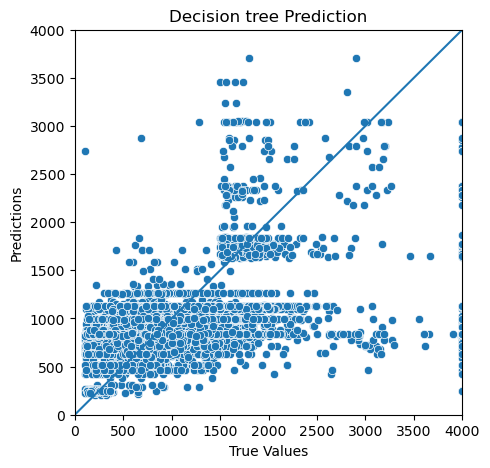

In [55]:
from sklearn.tree import DecisionTreeRegressor
param={
        "max_depth" : 100,
        "max_features":"sqrt",
        #'min_weight_fraction_leaf': 0.001,
        'min_samples_leaf': 4,
        "max_leaf_nodes":300 }

tuned_hyper_model_org= DecisionTreeRegressor(**param, random_state=42)
tuned_hyper_model_org.fit(X_train,y_train)
y_pred1 =tuned_hyper_model_org.predict(X_train)

print("----train---")
print('MAE:',metrics.mean_absolute_error(y_train, y_pred1))
print('R-square:',metrics.r2_score(y_train, y_pred1))
print('MSE',metrics.mean_squared_error(y_train, y_pred1))



y_pred =tuned_hyper_model_org.predict(X_test)
print("----test---")
print('MAE:',metrics.mean_absolute_error(y_test, y_pred))
print('R-square:',metrics.r2_score(y_test, y_pred))
print('MSE',metrics.mean_squared_error(y_test, y_pred))

fig, ax = plt.subplots(figsize=(5,5))
sns.scatterplot(x = y_test, y = y_pred , ax=ax)
plt.xlabel('True Values')
plt.ylabel('Predictions')
lims = [0, 4000]
plt.xlim(lims)
plt.ylim(lims)
plt.title('Decision tree Prediction')
_ = plt.plot(lims,lims)
gap = y_pred-y_test
print("mean diff:",gap.mean())
tuned_hyper_model_org.feature_importances_

----test---
MAE: 357.917968967266
R-square: -0.000830540496766341
MSE 294156.35379132285
mean diff: -22.28121147361617


array([5.47324899e-03, 9.91982399e-03, 9.80196455e-03, 0.00000000e+00,
       1.59517636e-03, 1.14547108e-04, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.06313275e-03, 4.85317165e-04, 4.02727844e-04,
       2.84335238e-04, 8.13186828e-04, 6.81030914e-04, 1.15355257e-03,
       4.75243415e-04, 2.26006049e-04, 9.92295341e-04, 1.05867309e-04,
       1.74088938e-02, 1.50650573e-01, 2.68089339e-02, 7.71544143e-01])

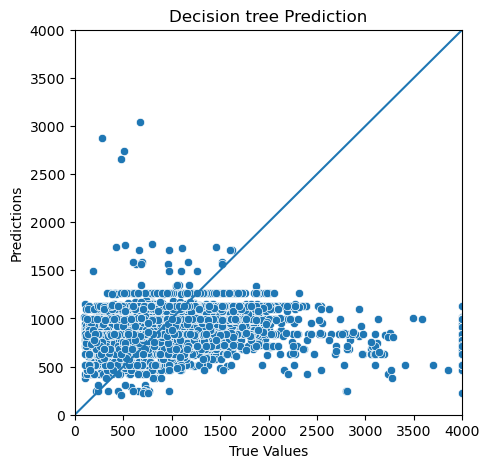

In [47]:
from sklearn.tree import DecisionTreeRegressor

y_test1 = y2
X_test1 = x2


y_pred =tuned_hyper_model_org.predict(X_test1)
print("----test---")
print('MAE:',metrics.mean_absolute_error(y_test1, y_pred))
print('R-square:',metrics.r2_score(y_test1, y_pred))
print('MSE',metrics.mean_squared_error(y_test1, y_pred))

fig, ax = plt.subplots(figsize=(5,5))
sns.scatterplot(x = y_test1, y = y_pred , ax=ax)
plt.xlabel('True Values')
plt.ylabel('Predictions')
lims = [0, 4000]
plt.xlim(lims)
plt.ylim(lims)
plt.title('Decision tree Prediction')
_ = plt.plot(lims,lims)
print("mean diff:",gap.mean())
tuned_hyper_model_org.feature_importances_